In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import optimize
from scipy.interpolate import make_interp_spline
pd.set_option('display.max_columns', None)

#### We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.

#### 1.fitting it to the periodic function                                                                                                                                                                      

#### 2.plot the fit

In [11]:
Max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
month = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

Text(0, 0.5, 'Temp')

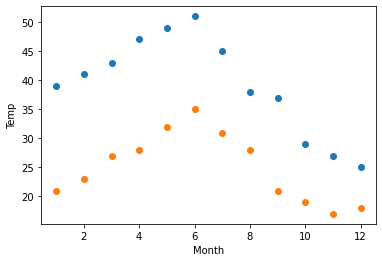

In [12]:
plt.scatter(month, Max)
plt.scatter(month, Min)
plt.xlabel('Month') 
plt.ylabel('Temp')

In [13]:
def periodic_func(times, avg, ampl, time_offset):
    return (avg + ampl* np.cos((times + time_offset) * 1.8 * np.pi/ times.max()))


res_max, sin_max = optimize.curve_fit(periodic_func,month, Max,[40,20,0])
res_min, sin_min = optimize.curve_fit(periodic_func,month, Min,[-40,20,0])

print(res_max)
print(res_min)

[ 38.31897591 -11.40523793   1.73212149]
[24.2013286  -8.13512334  1.17137919]


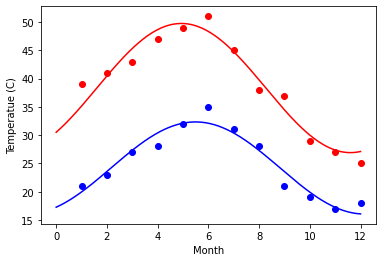

In [14]:
days = np.linspace(0, 12, num = 365)
plt.plot(month, Max, 'ro')
plt.plot(days, periodic_func(days, *res_max), 'r-')
plt.plot(month, Min, 'bo')
plt.plot(days, periodic_func(days, *res_min), 'b-')
plt.xlabel('Month') 
plt.ylabel('Temperatue (C)')
plt.show()

#### 1. Create a pie chart presenting the male/female proportion

In [15]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')

In [16]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [17]:
print(titanic.groupby("sex")["sex"].count())
ytitle = ['Male','Female']

sex
female    466
male      843
Name: sex, dtype: int64


In [18]:
y=[843,466]
myexplode = [0, 0.1]
textprops = {'Male':843,'Female':466}

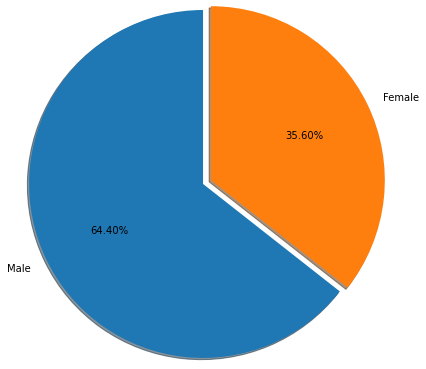

In [19]:
plt.pie(y, labels = ytitle, radius=2,explode = myexplode,autopct='%1.2f%%', startangle = 90, shadow = True)
plt.show() 

#### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

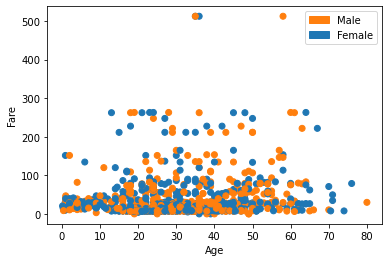

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.random import randn
import matplotlib.patches as mpatches


Age = titanic['age']  
Fare = titanic['fare']
Sex =['male','female']*655   #len(Age) is 1310 to make sex length equal to Age we multiply by 655

df = pd.DataFrame(dict(Age=Age, Fare=Fare, Sex = Sex))

fig, ax = plt.subplots()

colors = {'male':'tab:orange', 'female':'tab:blue'}

male = mpatches.Patch(color='tab:orange', label='Male')
female = mpatches.Patch(color='tab:blue', label='Female')



ax.scatter(df['Age'], df['Fare'], c=df['Sex'].map(colors),label=colors)
plt.xlabel('Age') 
plt.ylabel('Fare') 
plt.legend(handles=[male,female],loc=0)
plt.show()


In [27]:
# Simple and Short approach

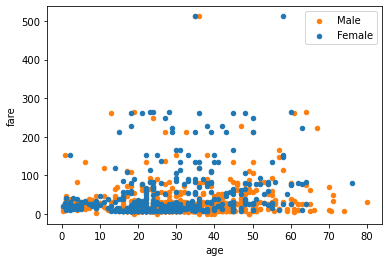

In [28]:
category = titanic[titanic['sex'] == 'male'].plot.scatter('age','fare',color = 'tab:orange', label='Male')
titanic[titanic['sex'] == 'female'].plot.scatter('age','fare',color = 'tab:blue', label='Female',ax = category)
plt.show()